# **Functional API**

Functional API:

The functional API allows to define a model by connecting layers explicitly. Each layer is a function that takes inputs and produces outputs. It's particularly useful when dealing with models that have multiple inputs, multiple outputs, shared layers, or non-sequential connections.
More flexible and supports complex architectures, including multi-input and multi-output models.Allows creating directed acyclic graphs of layers.

In [ ]:
from keras.models import Model

In [ ]:
model=Model(inputs=x, outputs=[output1, output2] )

In [ ]:
from keras.layers import *

In [ ]:
x=Input(shape=(3,))

In [ ]:
hidden1= Dense(128, activation='relu')(x)
hidden2= Dense(64,activation='relu')(hidden1)

output1= Dense(1, activation='linear')(hidden2)
output2= Dense(1, activation='sigmoid')(hidden2)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  512       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   8256      ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 1)                    65        ['dense_1[0][0]']             
                                                                                              

In [ ]:
from keras.utils import plot_model

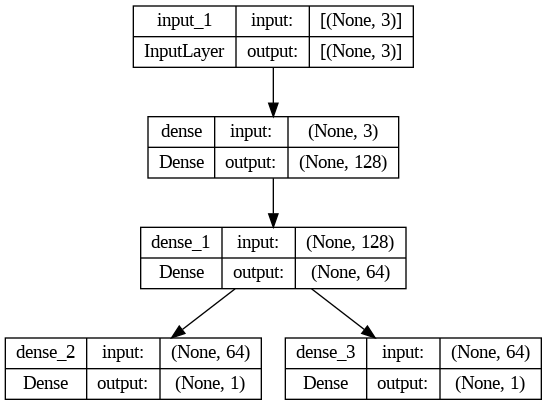

In [ ]:
plot_model(model, show_shapes=True)

#**Second demo**

In [ ]:
from keras.models import Model

In [ ]:
from keras.layers import *

In [ ]:
# Define two sets of input
input_1=Input(shape=(32,))
input_2=Input(shape=(128,))

In [ ]:
# First branch operates on the first input
x= Dense(8, activation='relu')(input_1)
x1= Dense(4, activation='relu')(x)

In [ ]:
# The second branch operates on the second input
y= Dense(64, activation='relu')(input_2)
y1= Dense(32, activation='relu')(y)
y2= Dense(4, activation='relu')(y1)

In [ ]:
# Combine the output of the two branches
combined=concatenate([x1,y2])

In [ ]:
# Apply  a FC layer and then a regressor prediction on the
# combined outputs
z=Dense(2, activation='relu')(combined)
z1=Dense(1, activation='linear')(z)

In [ ]:
# Our model will accept the inputs of the two branches and then output a single value
model= Model(inputs=[input_1, input_2], outputs=z1)

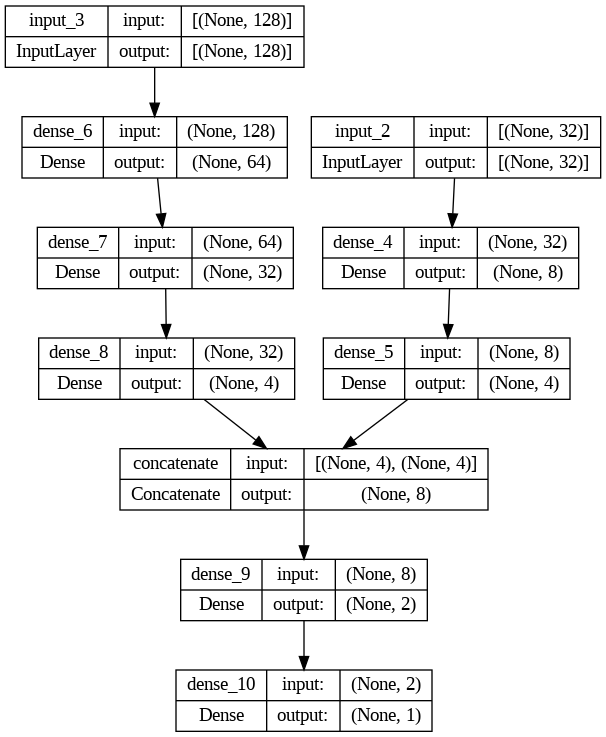

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

# Multi Output Model

Age and gender prediction based on photos.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

100% 331M/331M [00:16<00:00, 25.1MB/s]
100% 331M/331M [00:16<00:00, 20.5MB/s]


In [ ]:
import zipfile
zip= zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/utkface-new.zip' mode='r'>>

In [ ]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
folder_path='/content/utkface_aligned_cropped/UTKFace'

In [ ]:
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [ ]:
len(age)

23708

In [ ]:
df= pd.DataFrame({'age':age,'gender':gender, 'img':img_path})


In [ ]:
df.shape

(23708, 3)

In [ ]:
df.head()

,age,gender,img
0,26,1,26_1_3_20170119193145481.jpg.chip.jpg
1,25,0,25_0_3_20170119171838017.jpg.chip.jpg
2,26,1,26_1_1_20170112235926962.jpg.chip.jpg
3,32,1,32_1_1_20170117134811472.jpg.chip.jpg
4,50,0,50_0_0_20170117155052592.jpg.chip.jpg


In [ ]:
train_df=df.sample(frac=1,random_state=0).iloc[:20000]
test_df=df.sample(frac=1,random_state=0).iloc[20000:]

In [ ]:
train_df.shape, test_df.shape

((20000, 3), (3708, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator( rescale=1./255,
                                 rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(train_df,
                                            directory=folder_path,
                                                   x_col='img',
                                                  y_col=['age','gender'],
                                                       target_size=(200,200),
                                                  class_mode='multi_output')
test_generator=test_datagen.flow_from_dataframe(test_df,
                                            directory=folder_path,
                                                   x_col='img',
                                                  y_col=['age','gender'],
                                                       target_size=(200,200),
                                                  class_mode='multi_output')


Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

Using Transfer learning

In [ ]:
vggnet= VGG16(include_top=False, input_shape=(200,200,3))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
vggnet.trainable=False

output= vggnet.layers[-1].output

flatten= Flatten()(output)

dense1=Dense(512, activation='relu')(flatten)
dense2=Dense(512, activation='relu')(flatten)

dense3=Dense(512, activation='relu')(dense1)
dense4=Dense(512, activation='relu')(dense2)


output1=Dense(1, activation='linear',name='age')(dense3)
output2=Dense(1, activation='sigmoid',name='gender')(dense4)

In [ ]:
model= Model(inputs=vggnet.input, outputs=[output1,output2])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 200, 200, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 200, 200, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

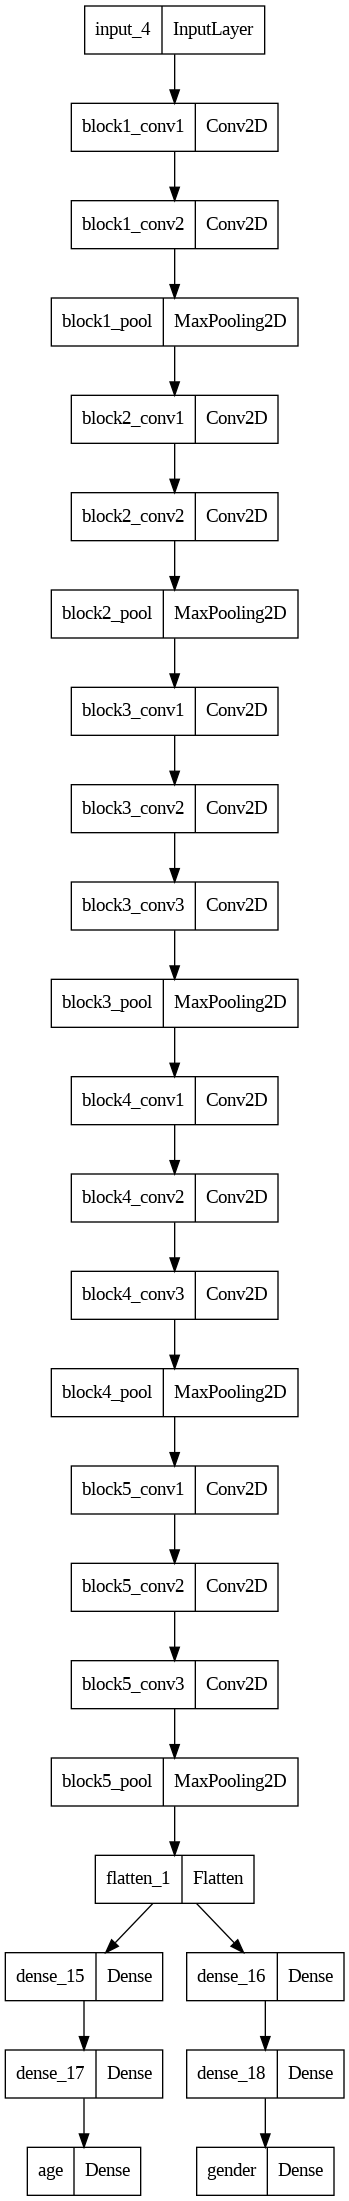

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss={'age':'mae', 'gender': 'binary_crossentropy'}, metrics={'age':'mae', 'gender':'accuracy'},loss_weights={'age':1,'gender':99})

In [ ]:
model.fit(train_generator, batch_size=32, epochs=5, validation_data= test_generator )

Epoch 1/5
625/625 [==============================] - 282s 452ms/step - loss: 48.1282 - age_loss: 8.7084 - gender_loss: 0.3982 - age_mae: 8.7084 - gender_accuracy: 0.8140 - val_loss: 41.2497 - val_age_loss: 7.8532 - val_gender_loss: 0.3373 - val_age_mae: 7.8532 - val_gender_accuracy: 0.8457
Epoch 2/5
625/625 [==============================] - 251s 401ms/step - loss: 47.2084 - age_loss: 8.5150 - gender_loss: 0.3908 - age_mae: 8.5150 - gender_accuracy: 0.8188 - val_loss: 44.9802 - val_age_loss: 8.3370 - val_gender_loss: 0.3701 - val_age_mae: 8.3370 - val_gender_accuracy: 0.8193
Epoch 3/5
625/625 [==============================] - 245s 392ms/step - loss: 45.9093 - age_loss: 8.2851 - gender_loss: 0.3800 - age_mae: 8.2851 - gender_accuracy: 0.8232 - val_loss: 40.3312 - val_age_loss: 7.5904 - val_gender_loss: 0.3307 - val_age_mae: 7.5904 - val_gender_accuracy: 0.8476
Epoch 4/5
625/625 [==============================] - 248s 397ms/step - loss: 45.3219 - age_loss: 8.2107 - gender_loss: 0.3749 -

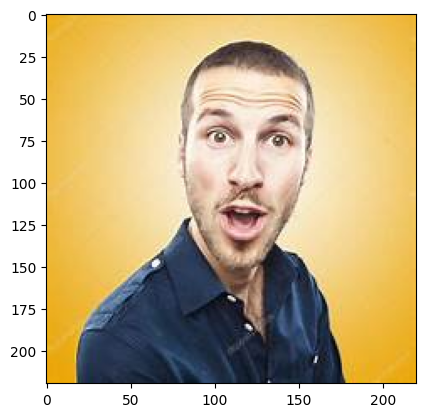

In [ ]:
import matplotlib.pyplot as plt
img=plt.imread('/content/men_2.jpg')
plt.imshow(img)

In [ ]:
from PIL import Image
import numpy as np

original_img = Image.open('/content/men_2.jpg')

resized_img = original_img.resize((200, 200))
resized_img_array = np.array(resized_img) / 255.0  # Normalize pixel values if needed

# Add batch dimension (assuming you're using a batch size of 1)
resized_img_array = np.expand_dims(resized_img_array, axis=0)
model.predict(resized_img_array)

1/1 [==============================] - 1s 693ms/step


[array([[61.49268]], dtype=float32), array([[0.23676199]], dtype=float32)]

In [ ]:
from PIL import Image
import numpy as np

original_img = Image.open('/content/men.jpg')

resized_img = original_img.resize((200, 200))
resized_img_array = np.array(resized_img) / 255.0  # Normalize pixel values if needed

# Add batch dimension (assuming you're using a batch size of 1)
resized_img_array = np.expand_dims(resized_img_array, axis=0)
model.predict(resized_img_array)

1/1 [==============================] - 0s 107ms/step


[array([[78.83208]], dtype=float32), array([[0.11321169]], dtype=float32)]